<h1>HW3</h1>

# Question 1
### (Bayes Theorem) Read the following example and complete the exercises 

Trolls Under the Bridge
1. Trolls(T) are bad
2. Gnomes(G) are benign
3. Every bridge has 5 creatures under it

Below are the probabilities of what creatures live under a bridge:
1. TTGGG: 20% (E1)
2. TGGGG: 20% (E2)
3. GGGGG: 60% (E3)

A knight is approaching a bridge and he wants to know his chance of crossing the bridge safely.

### 1.1 

#### What is the chance of the knight crossing the bridge safely?


60% of the bridges have only gnomes which are benign, while all other bridges have at least one troll.
For this reason, the knight has a 60% of crossing the bridge safely

In [ ]:
# P(E1) = 20%
p_E1 = 0.2 #TTGGG so dangerous
#P(E2) = 20%
p_E2 =0.2 #TGGGG so dangerous
#P(E3) = 60%
p_E3 = 0.6 #GGGGG so safe
println("The knight has a ", E3*100, "% chance of crossing the bridge safely!")

### 1.2

#### Before crossing a bridge, a knight captures a troll. “I now have an 80% chance of crossing safely,” he reasons, “since only the case 20% had TTGGG (E1) now have TGGG is still a threat.”

#### Do you agree with him? Why?

I do not agree with the knight because the presence of a troll automatically means he is not on the 60% of bridges that are safe. That limits his options to E1 and E2 and gets rid 60% of the safe options.

In [ ]:
#P(E3|T) = (P(T|E3)*P(E3))/P(T) = 0 because all E3 bridges only have gnomes
pE3_T = (0*p_E3)/(p_T);
# This leaves the remaining 40% of bridges, and makes the odds worse for the knight to cross safely

### 1.3

#### Now he wants to use Bayes' theorem to calculate his chance of crossing safely given a troll captured 

\begin{equation*}
P(A|B) = \frac{P(B|A)P(A)}{P(B)} \\
P(A|B): Posteior \\
P(B|A): Likelihood \\
P(A): Prior \\
P(B): Marginal Probability \\
\end{equation*}

#### Given the three events, E1, E2, and E3, which two of the three events does the knight need to consider after a troll was captured?

E1 and E2

### 1.4

#### Use Bayes' theorem to calculate the probability of the two events in 1.3 (separately) given the troll was captured. 

Probability of one event given a troll captured: 

In [ ]:
#P(E1|T) = (P(T|E1)*P(E1)/P(T)) where P(T) needs to be found
#P(T) = P(E1 AND T)+P(E2 AND T) + P(E3 AND T)
p_T = (p_E1*(2/5)) + (p_E2*(1/5)) + (p_E3*0) #out of every 25 creatures there are 3 trolls
#and P(T|E1) is the prob of trolls on E1 bridges = 2/5 because E1 is TTGGG
p_T_E1 = 2/5

In [ ]:
# so P(E1|T) is:
p_E1_T = p_E1*p_T_E1/p_T
println("The chance that the knight is on a bridge with two trolls is ", Float16(p_E1_T*100),"%!")

Probability of the other event given a troll captured: 

In [ ]:
#P(E2|T) = P(T|E2)*P(E2)/P(T)
#we know P(T) so what is P(T|E2)?
#P(T|E2) is the prob of trolls on E2 bridges = 1/5 because E2 is TGGGG
p_T_E2 = 1/5

In [ ]:
# so P(E2|T) is:
p_E2_T = p_E2 * p_T_E2/p_T
println("The chance that the knight is on a bridge that had only one troll (the one he captured) is ", Float16(p_E2_T*100),"%!")

### 1.5

#### What is the chance of the knight crossing safely?

In [ ]:
#Because he captured a troll, the only chance of safety is if he was on a bridge that only had one troll or the case of E2
println("Given that he captured a troll, the chances of the knight crossing the bridge safely is ", Float16(p_E2_T*100),"%!")

#### Now looking back to 1.1, the probabilities were changed after assimilating data! 

# Question 2
### (Polynomial Fitting) Read the following example and complete the exercises 

Biological data always comes with errors that influence the intepretation of the data significantly. In this question, we will simulate data and see how noises affect the parameter estimation.

In [1]:
import Pkg
Pkg.add(["Distributions", "Plots", "Polynomials", "Random"])

    Updating registry at `C:\Users\solim\.julia\registries\General.toml`
   Resolving package versions...
  No Changes to `C:\Users\solim\.julia\environments\v1.8\Project.toml`
  No Changes to `C:\Users\solim\.julia\environments\v1.8\Manifest.toml`


In [2]:
import Distributions as di
import Plots
import Polynomials
import Random

### 2.1

1. Generate the independent variable x ranging from -10 to 10 with an increment of 1
2. Generate the dependent variable y_true using the equation y_true = x^2 + 3x - 2


In [3]:
x = -10.0:10.0
collect(x)

21-element Vector{Float64}:
 -10.0
  -9.0
  -8.0
  -7.0
  -6.0
  -5.0
  -4.0
  -3.0
  -2.0
  -1.0
   0.0
   1.0
   2.0
   3.0
   4.0
   5.0
   6.0
   7.0
   8.0
   9.0
  10.0

In [4]:
y_true = x.^2 + 3.0 .*x .- 2

21-element Vector{Float64}:
  68.0
  52.0
  38.0
  26.0
  16.0
   8.0
   2.0
  -2.0
  -4.0
  -4.0
  -2.0
   2.0
   8.0
  16.0
  26.0
  38.0
  52.0
  68.0
  86.0
 106.0
 128.0

### 2.2

1. Generate the Guassian noises with zero mean and a standard deviation of 10

2. Add the noises to y_true to obtain y_observed


In [5]:
g_noise = di.Normal(0.0,10.0)

Distributions.Normal{Float64}(μ=0.0, σ=10.0)

In [6]:
y_observed = y_true .+ rand(g_noise,length(x))

21-element Vector{Float64}:
  51.32576610456846
  44.16617742085143
  42.152397381426844
  23.641425137816658
  12.252722290790171
  14.058494224816421
  -8.593258323054258
 -24.04437117876267
  -7.213824499175674
   2.33245070403923
  -4.290437622711517
 -12.35710123592006
   2.9860269254130962
   5.863160298349715
  37.79872575324933
  31.705116973580346
  47.880146018156296
  66.71821111581976
 101.24312443344995
 117.42114572888461
 127.12450567891251

### 2.3

#### Fit the data (x, y_observed) with a second order polynomial. 

1. Make a scatter plot of y_observed along x
2. Plot a line of y_true along x on the scatter plot
3. Plot a line of the fitted polynomial along x on the same plot

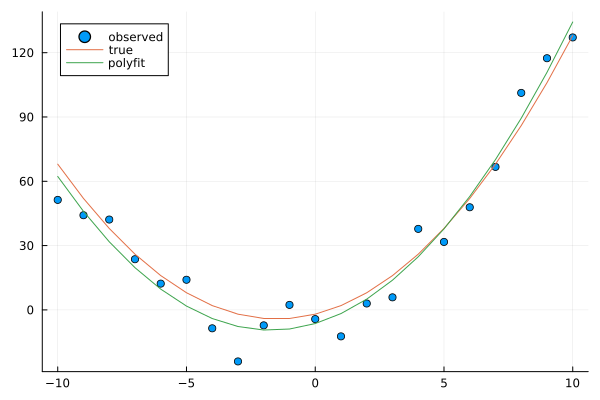

In [10]:
using Plots
using Polynomials
scatter(x,y_observed, label = "observed")
plot!(x,y_true, label = "true")
poly_fit = fit(x,y_observed,2) #creates a polynomial fit of y_observed with an order of 2
y_poly_fit = poly_fit.(x)
plot!(x,y_poly_fit, label = "polyfit")

### 2.4

1. Repeat 2.2 and 2.3 with a noise with a standard deviation of 50

In [11]:
g_noise_2 = di.Normal(0,50)

Distributions.Normal{Float64}(μ=0.0, σ=50.0)

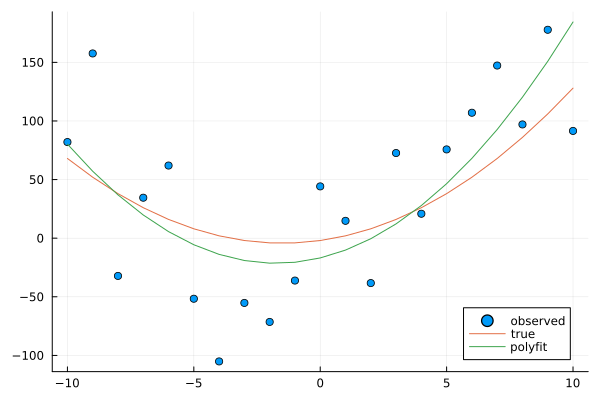

In [16]:
y_observed_2 = y_true .+ rand(g_noise_2,length(x))
scatter(x,y_observed_2, label = "observed")
plot!(x,y_true, label = "true")
poly_fit = fit(x,y_observed_2,2) 
y_poly_fit = poly_fit.(x)
plot!(x,y_poly_fit, label = "polyfit")

2. Compare the plot with the plot in 2.3. Is the fit closer to y_true or not, and why?

The second fit is not a closer fit to y_true because it has a greater standard deviation. Since the mean did not change between the two, changing the standard deviation from 10 to 50 caused the polynomial fit to vary farther from y_true. This is why poly fit curve does not align as well with either the data or the true line.

### 2.5

#### Repeat 2.2 and 2.3 with a tenth order polynomial fit


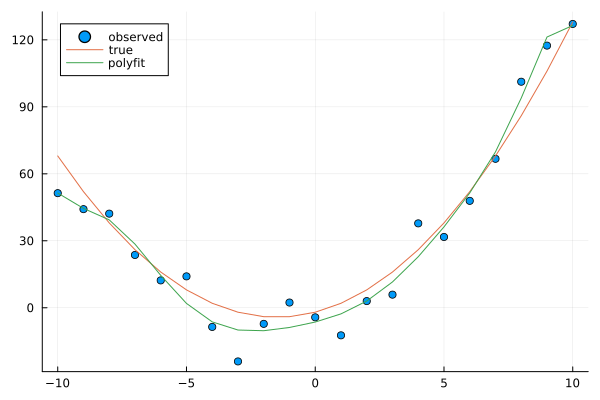

In [17]:
scatter(x,y_observed, label = "observed")
plot!(x,y_true, label = "true")
poly_fit = fit(x,y_observed,10) 
y_poly_fit = poly_fit.(x)
plot!(x,y_poly_fit, label = "polyfit")

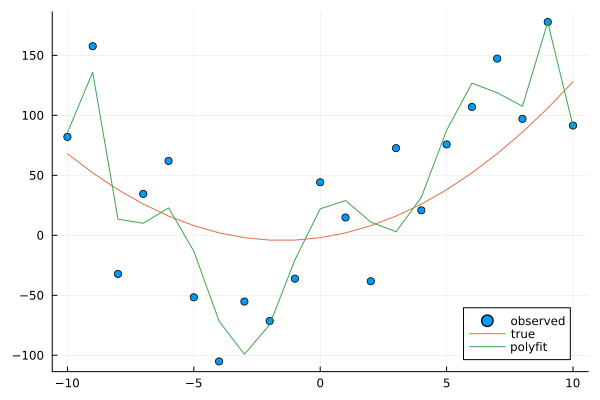

In [18]:
scatter(x,y_observed_2, label = "observed")
plot!(x,y_true, label = "true")
poly_fit = fit(x,y_observed_2,10) 
y_poly_fit = poly_fit.(x)
plot!(x,y_poly_fit, label = "polyfit")

### 2.6

1. Create a new independent parameter x_fit ranging from -11 to 11 with an increment of 0.1
2. Plot the same three plots as in 2.3 again but apply the tenth order polynomial to x_fit instead of x


In [25]:
x_fit = -11.0:0.1:11.0
collect(x_fit)
y_fit_observed = x_fit.^2.0 + 3.0 .*x_fit .- 2.0

221-element Vector{Float64}:
  86.0
  84.11000000000001
  82.24000000000001
  80.38999999999999
  78.56
  76.75
  74.96000000000001
  73.19000000000003
  71.44
  69.71
  68.0
  66.31
  64.64000000000001
   ⋮
 125.71000000000001
 128.0
 130.31
 132.64
 134.99
 137.36
 139.75
 142.16
 144.58999999999997
 147.04000000000002
 149.51
 152.0

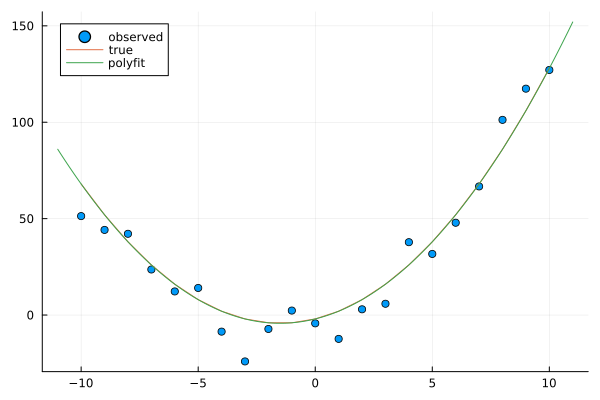

In [31]:
scatter(x,y_observed, label = "observed")
plot!(x,y_true, label = "true")
poly_fit = fit(x_fit,y_fit_observed,10) 
y_poly_fit = poly_fit.(x_fit)
plot!(x_fit,y_poly_fit, label = "polyfit")

3. What do you observe in the plot? What is this phenomenon called?

The tenth order polynomial fit and x_fit appear to match perfectly despite the additional guassian noise. This is because x_fit uses many more equidistant data points than x, and the tenth order polynomial fit oscillates much more causing them to match frequently and appear to correlate. This is called Runger's phenomenon.